In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

# Дифракция на ультразвуковых волнах

1.07188 MHz
1.09845 MHz
1.11184 MHz
1.12539 
1.13823


In [54]:
freqs = []

counts = []

div_price = 4 #um
freqs.append(1.07188)
counts.append([11, 53, 86, 125, 164, 203, 240])

freqs.append(1.19215)
counts.append([69, 113, 155, 191, 233, 279, 326, 365, 409])

freqs.append(1.24837)
counts.append([0, 39, 76, 119, 164])

freqs.append(2.89424)
counts.append([36,141,244, 345, 449, 554, 656])

freqs.append(4.83451)
counts.append([75, 248, 418])


for i in range(len(counts)):
    for j in range(len(counts[i])):
        counts[i][j]*=4

152.14285716551439 47.57142847768184
169.73333332413577 272.17777787720496
163.19999998270296 -7.9999999415640755
413.00000004158807 146.7142855340706
686.0 302.0


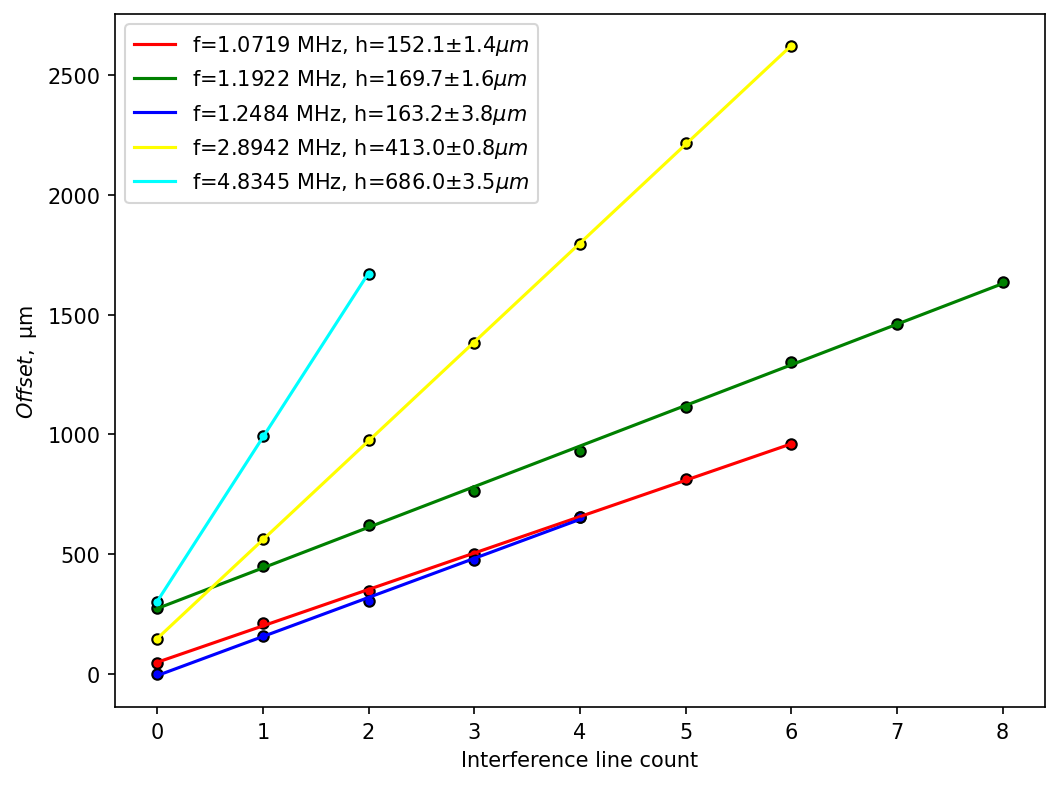

In [67]:
fig, ax = plt.subplots(figsize=(8,6))
fig.set_dpi(150)

curve = lambda x, k, b: k*x + b


ax.set_prop_cycle(markerfacecolor=['red', 'green', 'blue', 'yellow', 'cyan'],
                  color=['red', 'green', 'blue', 'yellow', 'cyan'])

popts=[]
pcovs=[]
for i in range(len(freqs)):
    popt, pcov = curve_fit(curve, np.array(range(len(counts[i]))), counts[i])
    ax.plot(
        counts[i], 
        marker='o',               # Маркеры для точек
        linestyle='',            # Стиль линии
        linewidth=2,              # Толщина линии
        color='royalblue',        # Цвет линии
        markersize=5,             # Размер маркеров
        markeredgecolor='black',  # Цвет границы маркеров
    )
    popts.append(popt)
    pcovs.append(pcov)
for i in range(len(freqs)):
    ax.plot(curve(np.array(range(len(counts[i]))), *popts[i]),
            label='f={:.4f} MHz, '.format(freqs[i]) +'h={:.1f}'.format(popts[i][0])+r'$\pm$'+'{:.1f}'.format(np.sqrt(np.diag(pcovs[i]))[0])+r'$\mu m$')
    print(*popts[i])

ax.set_xlabel(r'Interference line count')
ax.set_ylabel(r'$Offset,~\mathrm{\mu m}$')
ax.legend()
       


640 nm
156 um
28 cm

$F_1 = 30~\mathrm{cm}$
$F_2 = 28~\mathrm{cm}$
$\lambda = (640 \pm 20)~\mathrm{nm}$

(array([143.29786006,  -5.36654757]),
 array([[  4.85891782, -10.92396338],
        [-10.92396338,  34.86534283]]))

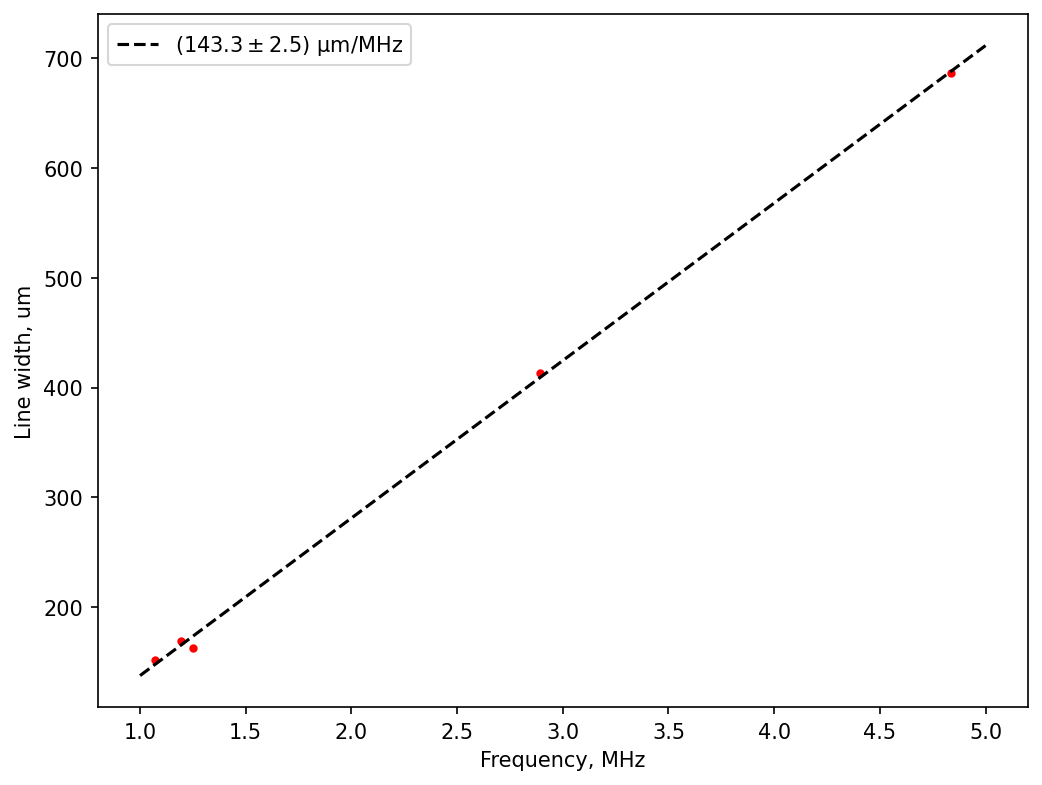

In [79]:
ystaterr = np.array((1.4, 1.6, 3.8, 0.8, 3.5))
ydeferr = np.array((4.0, 4.0, 4.0, 4.0, 4.0))
yerr = (ystaterr**2 + ydeferr**2)**0.5
h = np.array((152.1, 169.7, 163.2, 413.0, 686.0))

fig, ax = plt.subplots(figsize=(8,6))
fig.set_dpi(150)

ax.plot(freqs, 
            h,
            linestyle='',
            marker='o',
            markersize=3,
            color='red')

popt, pcov = curve_fit(curve, freqs, h)
ls = np.linspace(1.0, 5.0, 100)
ax.plot(ls,
        curve(ls, *popt),
        linestyle='--',
        color='black',
        label=r'$(143.3\pm2.5)~\mathrm{\mu m/MHz}$')

ax.set_xlabel('Frequency, MHz')
ax.set_ylabel('Line width, um')
ax.legend()
popt, pcov

# Метод тёмного поля

Положение винта: 43 деления по 4 um, 0 на основной шкале

In [3]:
divs = [0, 1, 2, 3, 4, 5]
divs_self = [0, 15, 30, 45, 60 ,75, 90]

Измерение частоты полос

In [83]:
freqs2 = []
lengths2 = []

freqs2.append(1.09993)
lengths2.append([3,14,25,36,46,56,68,78,88,98])

freqs2.append(1.24945)
lengths2.append([2,10,20,29,39,48,56,66,75,84,93])

freqs2.append(2.87976)
lengths2.append([2,6,10,13,17,22,26,30,34,37,42,46,50,54,58,61,65,69,73,77,81,85,89,93,97])

[0.06541526 0.34922189]
[0.04605663 0.27247468]
[0.01143993 0.16015909]


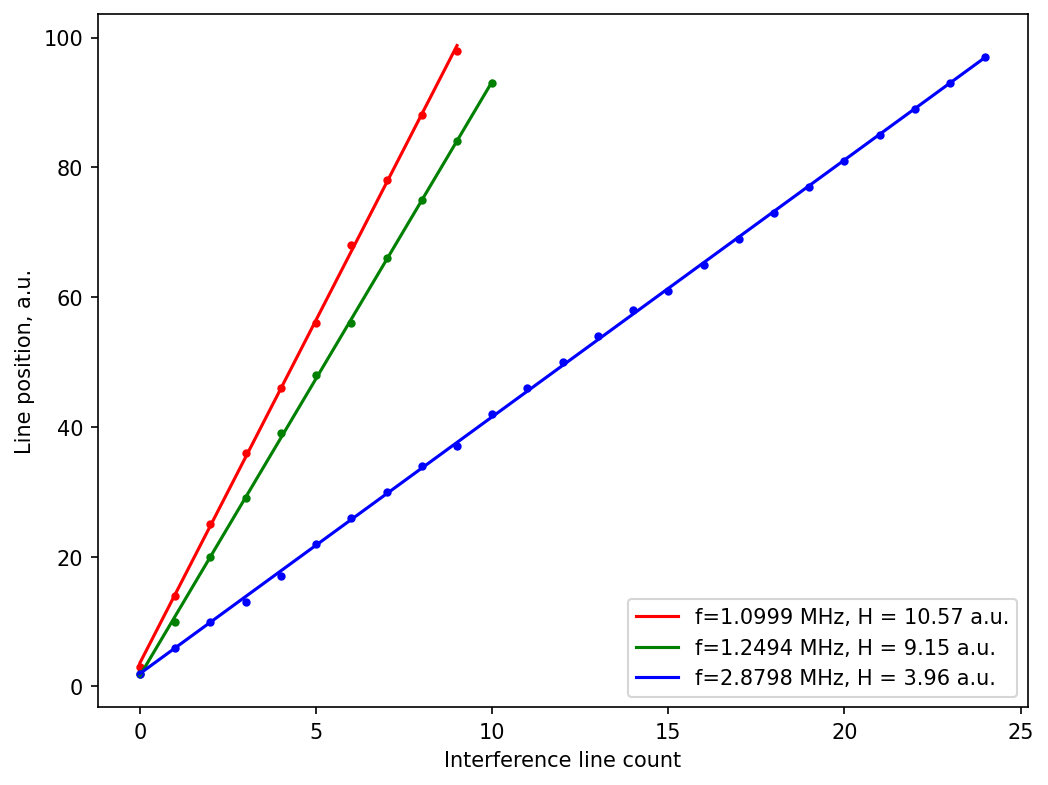

In [95]:
fig, ax = plt.subplots(figsize=(8,6))
fig.set_dpi(150)

ax.set_prop_cycle(color=['red', 'green', 'blue'])

for i in range(len(freqs2)):
    ax.plot(lengths2[i],
            linestyle='',
            marker='o',
            markersize=3)
for i in range(len(freqs2)):
    popt, pcov = curve_fit(curve, np.array(range(len(lengths2[i]))), lengths2[i])
    ls=np.array(range(len(lengths2[i])))
    print(np.sqrt(np.diag(pcov)))
    ax.plot(ls, 
            curve(ls, *popt), 
            label='f={:.4f} MHz, '.format(freqs2[i])+'H = {:.2f} a.u.'.format(popt[0]))

ax.set_xlabel('Interference line count')
ax.set_ylabel('Line position, a.u.')
ax.legend()
